# Importing the Necessary Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [3]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
file_name = '../original/g2-2-30.csv'
dataset_clusters = 2

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result2/t4.8k.csv'
#file_name = '../result2/t5.8k.csv'
#file_name = '../result2/t8.8k.csv'
#file_name = '../result2/t7.10k.csv'

#file_name = '../result2/g2-2-30.csv'
#file_name = '../result2/varying_densities.csv'


In [4]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim128.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.txt'
#file_name = '../BS3WC-Datasets/Synthetic/flame.txt'
#file_name = '../BS3WC-Datasets/Synthetic/jain.txt'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.txt'
#file_name = '../BS3WC-Datasets/Synthetic/R15.txt'
#file_name = '../BS3WC-Datasets/Synthetic/s1.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/s2.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/spiral.txt'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.txt'
#dataset_clusters = 8

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.data'
#file_name = '../BS3WC-Datasets/Real/dermatology.data'
#file_name = '../BS3WC-Datasets/Real/ecoli.data'
#file_name = '../BS3WC-Datasets/Real/glass.data'
#file_name = '../BS3WC-Datasets/Real/iris.data'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.data'
#file_name = '../BS3WC-Datasets/Real/segmentation.data'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.data'
#file_name = '../BS3WC-Datasets/Real/waveform.data'
#file_name = '../BS3WC-Datasets/Real/waveform2.data'
#file_name = '../BS3WC-Datasets/Real/wdbc.data'
#file_name = '../BS3WC-Datasets/Real/wine.data'
#file_name = '../BS3WC-Datasets/Real/yeast.data'


In [5]:
data = pd.read_csv(file_name)

In [6]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

g2-2-30


<_io.TextIOWrapper name='../Measurements/g2-2-30-measures.txt' mode='w+' encoding='UTF-8'>

In [7]:
from sklearn.metrics.cluster import normalized_mutual_info_score
    
def calculate_NMI(inside_points, labels, ground_truth, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [8]:
#calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(inside_points, labels, ground_truth, file_name, caption, no_outliers=False):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [10]:
#calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [11]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [12]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [13]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [14]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    #total = len(dataset)
    #for index, o_c in dataset.iterrows():
    #    key = tuple(o_c[features])
    #    if key in labels:
    #        if labels[key] == o_c['L']:
    #            correct += 1

    total = len(inside_points)
    for f in inside_points:
        if labels[f] == ground_truth[f]:
            correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [15]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [16]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [17]:
data.head()

Col1   Col2
0  500.0  537.0
1  522.0  507.0
2  438.0  567.0
3  515.0  500.0
4  509.0  475.0

In [18]:
data.shape

(2252, 2)

# Data Sampling

In [19]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(2252, 2)

In [20]:
sampled_df.head()

Col1   Col2
0  500.0  537.0
1  522.0  507.0
2  438.0  567.0
3  515.0  500.0
4  509.0  475.0

In [21]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [22]:
sampled_df.describe().transpose()


count        mean        std    min    25%    50%    75%    max
Col1  2252.0  549.044272  61.308540  402.0  498.0  546.5  601.0  693.0
Col2  2252.0  550.203419  64.680066  387.0  498.0  552.0  603.0  690.0

# Select Features of Interest for Clustering


In [23]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

../original/g2-2-30.csv
['Col1', 'Col2']


In [24]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(2252, 2)


In [25]:
select_df.head()

Col1   Col2
0  500.0  537.0
1  522.0  507.0
2  438.0  567.0
3  515.0  500.0
4  509.0  475.0

In [26]:
num_of_clusters = 0

In [27]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
#sampled_df

Centroids:  [496.11656278 499.56322351 598.26235607 604.00283437]
model
 [1 1 1 ... 0 0 0]


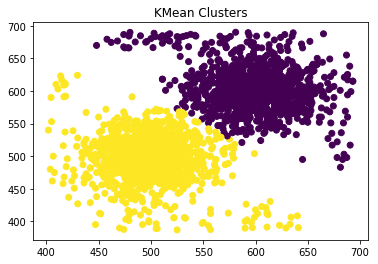

[0 1]
[0 1]


In [28]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################

In [29]:
sampled_df.head()

Col1   Col2  L
0  500.0  537.0  1
1  522.0  507.0  1
2  438.0  567.0  1
3  515.0  500.0  1
4  509.0  475.0  1

In [214]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [31]:
colors = ['#006400', '#228B22', '#32CD32', '#0BDA51', '#39FF14', '#00FF7F', '#90EE90', '#D0F0C0', '#D0F0C0', '#F0FFF0']
len(colors)

10

In [32]:
def getColor(R):
        if   R <= 0.1: col = colors[9]
        elif R <= 0.2: col = colors[8]
        elif R <= 0.3: col = colors[7]
        elif R <= 0.4: col = colors[6]
        elif R <= 0.5: col = colors[5]
        elif R <= 0.6: col = colors[4]
        elif R <= 0.7: col = colors[3]
        elif R <= 0.8: col = colors[2]
        elif R <= 0.9: col = colors[1]
        elif R <= 1.0: col = colors[0]
        return col


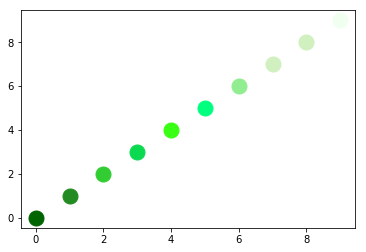

In [33]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [34]:
#len(c_k_o_i_3_norm[c_k_o_i_3_norm == 1])
#len(c_k_o_i_3_norm[c_k_o_i_3_norm <= 0.4])

In [145]:
def plot_custom_clusters_2(c_k_o_i, clusters_averages, clusters_labels, size, description, image_name, alpha=1, beta=0, not_outlier=False):
    X = np.array(select_df)
    for i in range(c_k_o_i.shape[0]):
        
        lab = int(sampled_df.iloc[i]['L'])
        if c_k_o_i[i][0] >= clusters_averages[0][2]:
            R = 1
        elif c_k_o_i[i][0] >= 0:
            R = c_k_o_i[i][0]
        else:
            R = 0
        
        if c_k_o_i[i][1] >= 0:
            G = c_k_o_i[i][1]
        else:
            G = 0
        
        #lab = sampled_df.iloc[i]['L']
        #col = colors[int((1-R)*10)-1]
        col = getColor(R)
        
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [146]:
#c_k_o_i_3_norm

In [147]:
import random
def getColorsInside():
    colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']
    for each in np.linspace(0, 1, num_of_clusters, retstep=False):
        colors.append(plt.cm.Spectral(each))
    colors.append('black')
    return colors
    

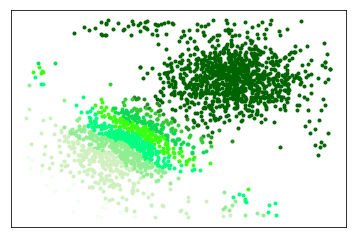

In [148]:
# Method 3
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result3')

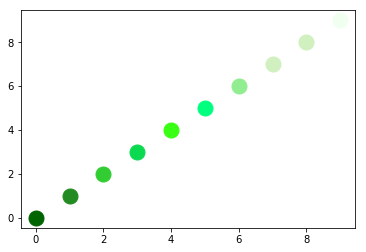

In [149]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [150]:
sigma_multiples = 4

In [151]:
sampled_df.shape


(2252, 3)

In [152]:
sampled_df.describe().transpose()


count        mean        std    min    25%    50%    75%    max
Col1  2252.0  549.044272  61.308540  402.0  498.0  546.5  601.0  693.0
Col2  2252.0  550.203419  64.680066  387.0  498.0  552.0  603.0  690.0
L     2252.0    0.498668   0.500109    0.0    0.0    0.0    1.0    1.0

In [153]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

1129
1123



# From Here Started Our Method

In [154]:
label_col_name = 'L'
#num_neighbors = 7
num_neighbors_all = len(select_df)
print(len(select_df))

2252


In [155]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors_all, return_distance=True)  

In [156]:
#knn[0] # Distances with neighbors
#knn[1]  # Indices of neighbours
#select_df.head()    
#knn[0].shape

In [157]:
row_neighbors_list_1 = {}
row_neighbors_dist_1 = {}

for i in range(knn[0].shape[0]):
    row_neighbors_list_1[i] = knn[1][i]
    row_neighbors_dist_1[i] = knn[0][i]
    #print(i, knn[i])


In [158]:
#row_neighbors_list_1

In [159]:
#row_neighbors_dist_1
clusters_labelss = np.unique(sampled_df[label_col_name])
for clusters_label in clusters_labelss:
    print(clusters_label)

0
1


In [160]:
def getNearestEvaluationValues(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            nearest_non_cluster_flage = False
            
            nearest_cluster_dist = -1
            nearest_non_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance
                    
                    #print("Nearest Cluster Flage and Distance")
                    #print(nearest_cluster_flage)
                    #print(nearest_cluster_dist)
                
                
                if neighbor_label != clusters_label and not nearest_non_cluster_flage:
                    nearest_non_cluster_flage = True
                    nearest_non_cluster_dist = dataset_distance
                
                    #print("Nearest Non-Cluster Flage and Distance")
                    #print(nearest_non_cluster_flage)
                    #print(nearest_non_cluster_dist)

                #print("Cluster Label and Neighbor Label")
                #print(clusters_label)
                #print(neighbor_label)
                
                
                if nearest_cluster_flage and nearest_non_cluster_flage:
                    break
            
            #print("_************************************************_")
            #print(nearest_cluster_dist)
            #print(nearest_non_cluster_dist)
            
            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            elif nearest_non_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = -1
            
            else:
                c_k_o_i[index][int(clusters_label)] = 1 - (nearest_cluster_dist/nearest_non_cluster_dist)
                
                #print(c_k_o_i[index][int(clusters_label)])

    return (c_k_o_i)


In [161]:
def getNearestEvaluationValues_2(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            farthest_cluster_flage = False
            
            nearest_cluster_dist = -1
            farthest_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            # Finding out Nearest to Cluster
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance
                    
                if nearest_cluster_flage:
                    break
                    
            # Finding out Farthest to Cluster
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][num_neighbors_all-i-1]
                dataset_distance = dataset_neighbors_dist[index][num_neighbors_all-i-1]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not farthest_cluster_flage:
                    farthest_cluster_flage = True
                    farthest_cluster_dist = dataset_distance
                    
                if farthest_cluster_flage:
                    break

                    
            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            elif farthest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            else:
                #c_k_o_i[index][int(clusters_label)] = 1 - (farthest_cluster_dist - nearest_cluster_dist)
                c_k_o_i[index][int(clusters_label)] = (nearest_cluster_dist/farthest_cluster_dist)
                
                #print(c_k_o_i[index][int(clusters_label)])
    return (c_k_o_i)


In [162]:
def getNearestEvaluationValues_3(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            farthest_cluster_flage = False
            
            nearest_cluster_dist = -1
            farthest_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            neighbor_count = 0
            for i in range(8):
                dataset_index = dataset_neighbors_indices[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label:
                    neighbor_count += 1
            
            #print("neighbor_count: ", neighbor_count)
            if neighbor_count >= 7:
                #c_k_o_i[index][int(clusters_label)] = 1
                c_k_o_i[index][int(clusters_label)] = 0
                
            else:
                # Finding out Nearest to Cluster
                for i in range(num_neighbors_all):
                    dataset_index = dataset_neighbors_indices[index][i]
                    dataset_distance = dataset_neighbors_dist[index][i]

                    # Don't consider itself as neighbor
                    if index == dataset_index:
                        continue


                    neighbor_label = int(sampled_df.iloc[dataset_index]['L'])

                    if neighbor_label == clusters_label and not nearest_cluster_flage:
                        nearest_cluster_flage = True
                        nearest_cluster_dist = dataset_distance

                    if nearest_cluster_flage:
                        break

                # Finding out Farthest to Cluster
                for i in range(num_neighbors_all):
                    dataset_index = dataset_neighbors_indices[index][num_neighbors_all-i-1]
                    dataset_distance = dataset_neighbors_dist[index][num_neighbors_all-i-1]

                    # Don't consider itself as neighbor
                    if index == dataset_index:
                        continue


                    neighbor_label = int(sampled_df.iloc[dataset_index]['L'])

                    if neighbor_label == clusters_label and not farthest_cluster_flage:
                        farthest_cluster_flage = True
                        farthest_cluster_dist = dataset_distance

                    if farthest_cluster_flage:
                        break


                if nearest_cluster_dist == 0:
                    c_k_o_i[index][int(clusters_label)] = 0

                elif farthest_cluster_dist == 0:
                    c_k_o_i[index][int(clusters_label)] = -1

                else:
                    #c_k_o_i[index][int(clusters_label)] = 1 - (farthest_cluster_dist - nearest_cluster_dist)
                    #c_k_o_i[index][int(clusters_label)] = (nearest_cluster_dist/farthest_cluster_dist)
                    c_k_o_i[index][int(clusters_label)] = -(nearest_cluster_dist/farthest_cluster_dist)
                    #c_k_o_i[index][int(clusters_label)] = (farthest_cluster_dist/nearest_cluster_dist)

                #print(c_k_o_i[index][int(clusters_label)])
    return (c_k_o_i)


In [54]:
#c_k_o_i_3 = getNearestEvaluationValues_3(sampled_df, row_neighbors_list_1, row_neighbors_dist_1, label_col_name)

[0 1]
0
New clusters_label__________  0
New clusters_label__________  1
1
New clusters_label__________  0
New clusters_label__________  1
2
New clusters_label__________  0
New clusters_label__________  1
3
New clusters_label__________  0
New clusters_label__________  1
4
New clusters_label__________  0
New clusters_label__________  1
5
New clusters_label__________  0
New clusters_label__________  1
6
New clusters_label__________  0
New clusters_label__________  1
7
New clusters_label__________  0
New clusters_label__________  1
8
New clusters_label__________  0
New clusters_label__________  1
9
New clusters_label__________  0
New clusters_label__________  1
10
New clusters_label__________  0
New clusters_label__________  1
11
New clusters_label__________  0
New clusters_label__________  1
12
New clusters_label__________  0
New clusters_label__________  1
13
New clusters_label__________  0
New clusters_label__________  1
14
New clusters_label__________  0
New clusters_label__________  1

New clusters_label__________  1
126
New clusters_label__________  0
New clusters_label__________  1
127
New clusters_label__________  0
New clusters_label__________  1
128
New clusters_label__________  0
New clusters_label__________  1
129
New clusters_label__________  0
New clusters_label__________  1
130
New clusters_label__________  0
New clusters_label__________  1
131
New clusters_label__________  0
New clusters_label__________  1
132
New clusters_label__________  0
New clusters_label__________  1
133
New clusters_label__________  0
New clusters_label__________  1
134
New clusters_label__________  0
New clusters_label__________  1
135
New clusters_label__________  0
New clusters_label__________  1
136
New clusters_label__________  0
New clusters_label__________  1
137
New clusters_label__________  0
New clusters_label__________  1
138
New clusters_label__________  0
New clusters_label__________  1
139
New clusters_label__________  0
New clusters_label__________  1
140
New clusters

New clusters_label__________  1
247
New clusters_label__________  0
New clusters_label__________  1
248
New clusters_label__________  0
New clusters_label__________  1
249
New clusters_label__________  0
New clusters_label__________  1
250
New clusters_label__________  0
New clusters_label__________  1
251
New clusters_label__________  0
New clusters_label__________  1
252
New clusters_label__________  0
New clusters_label__________  1
253
New clusters_label__________  0
New clusters_label__________  1
254
New clusters_label__________  0
New clusters_label__________  1
255
New clusters_label__________  0
New clusters_label__________  1
256
New clusters_label__________  0
New clusters_label__________  1
257
New clusters_label__________  0
New clusters_label__________  1
258
New clusters_label__________  0
New clusters_label__________  1
259
New clusters_label__________  0
New clusters_label__________  1
260
New clusters_label__________  0
New clusters_label__________  1
261
New clusters

New clusters_label__________  1
369
New clusters_label__________  0
New clusters_label__________  1
370
New clusters_label__________  0
New clusters_label__________  1
371
New clusters_label__________  0
New clusters_label__________  1
372
New clusters_label__________  0
New clusters_label__________  1
373
New clusters_label__________  0
New clusters_label__________  1
374
New clusters_label__________  0
New clusters_label__________  1
375
New clusters_label__________  0
New clusters_label__________  1
376
New clusters_label__________  0
New clusters_label__________  1
377
New clusters_label__________  0
New clusters_label__________  1
378
New clusters_label__________  0
New clusters_label__________  1
379
New clusters_label__________  0
New clusters_label__________  1
380
New clusters_label__________  0
New clusters_label__________  1
381
New clusters_label__________  0
New clusters_label__________  1
382
New clusters_label__________  0
New clusters_label__________  1
383
New clusters

New clusters_label__________  1
491
New clusters_label__________  0
New clusters_label__________  1
492
New clusters_label__________  0
New clusters_label__________  1
493
New clusters_label__________  0
New clusters_label__________  1
494
New clusters_label__________  0
New clusters_label__________  1
495
New clusters_label__________  0
New clusters_label__________  1
496
New clusters_label__________  0
New clusters_label__________  1
497
New clusters_label__________  0
New clusters_label__________  1
498
New clusters_label__________  0
New clusters_label__________  1
499
New clusters_label__________  0
New clusters_label__________  1
500
New clusters_label__________  0
New clusters_label__________  1
501
New clusters_label__________  0
New clusters_label__________  1
502
New clusters_label__________  0
New clusters_label__________  1
503
New clusters_label__________  0
New clusters_label__________  1
504
New clusters_label__________  0
New clusters_label__________  1
505
New clusters

New clusters_label__________  1
613
New clusters_label__________  0
New clusters_label__________  1
614
New clusters_label__________  0
New clusters_label__________  1
615
New clusters_label__________  0
New clusters_label__________  1
616
New clusters_label__________  0
New clusters_label__________  1
617
New clusters_label__________  0
New clusters_label__________  1
618
New clusters_label__________  0
New clusters_label__________  1
619
New clusters_label__________  0
New clusters_label__________  1
620
New clusters_label__________  0
New clusters_label__________  1
621
New clusters_label__________  0
New clusters_label__________  1
622
New clusters_label__________  0
New clusters_label__________  1
623
New clusters_label__________  0
New clusters_label__________  1
624
New clusters_label__________  0
New clusters_label__________  1
625
New clusters_label__________  0
New clusters_label__________  1
626
New clusters_label__________  0
New clusters_label__________  1
627
New clusters

New clusters_label__________  1
734
New clusters_label__________  0
New clusters_label__________  1
735
New clusters_label__________  0
New clusters_label__________  1
736
New clusters_label__________  0
New clusters_label__________  1
737
New clusters_label__________  0
New clusters_label__________  1
738
New clusters_label__________  0
New clusters_label__________  1
739
New clusters_label__________  0
New clusters_label__________  1
740
New clusters_label__________  0
New clusters_label__________  1
741
New clusters_label__________  0
New clusters_label__________  1
742
New clusters_label__________  0
New clusters_label__________  1
743
New clusters_label__________  0
New clusters_label__________  1
744
New clusters_label__________  0
New clusters_label__________  1
745
New clusters_label__________  0
New clusters_label__________  1
746
New clusters_label__________  0
New clusters_label__________  1
747
New clusters_label__________  0
New clusters_label__________  1
748
New clusters

New clusters_label__________  1
855
New clusters_label__________  0
New clusters_label__________  1
856
New clusters_label__________  0
New clusters_label__________  1
857
New clusters_label__________  0
New clusters_label__________  1
858
New clusters_label__________  0
New clusters_label__________  1
859
New clusters_label__________  0
New clusters_label__________  1
860
New clusters_label__________  0
New clusters_label__________  1
861
New clusters_label__________  0
New clusters_label__________  1
862
New clusters_label__________  0
New clusters_label__________  1
863
New clusters_label__________  0
New clusters_label__________  1
864
New clusters_label__________  0
New clusters_label__________  1
865
New clusters_label__________  0
New clusters_label__________  1
866
New clusters_label__________  0
New clusters_label__________  1
867
New clusters_label__________  0
New clusters_label__________  1
868
New clusters_label__________  0
New clusters_label__________  1
869
New clusters

New clusters_label__________  1
976
New clusters_label__________  0
New clusters_label__________  1
977
New clusters_label__________  0
New clusters_label__________  1
978
New clusters_label__________  0
New clusters_label__________  1
979
New clusters_label__________  0
New clusters_label__________  1
980
New clusters_label__________  0
New clusters_label__________  1
981
New clusters_label__________  0
New clusters_label__________  1
982
New clusters_label__________  0
New clusters_label__________  1
983
New clusters_label__________  0
New clusters_label__________  1
984
New clusters_label__________  0
New clusters_label__________  1
985
New clusters_label__________  0
New clusters_label__________  1
986
New clusters_label__________  0
New clusters_label__________  1
987
New clusters_label__________  0
New clusters_label__________  1
988
New clusters_label__________  0
New clusters_label__________  1
989
New clusters_label__________  0
New clusters_label__________  1
990
New clusters

1096
New clusters_label__________  0
New clusters_label__________  1
1097
New clusters_label__________  0
New clusters_label__________  1
1098
New clusters_label__________  0
New clusters_label__________  1
1099
New clusters_label__________  0
New clusters_label__________  1
1100
New clusters_label__________  0
New clusters_label__________  1
1101
New clusters_label__________  0
New clusters_label__________  1
1102
New clusters_label__________  0
New clusters_label__________  1
1103
New clusters_label__________  0
New clusters_label__________  1
1104
New clusters_label__________  0
New clusters_label__________  1
1105
New clusters_label__________  0
New clusters_label__________  1
1106
New clusters_label__________  0
New clusters_label__________  1
1107
New clusters_label__________  0
New clusters_label__________  1
1108
New clusters_label__________  0
New clusters_label__________  1
1109
New clusters_label__________  0
New clusters_label__________  1
1110
New clusters_label__________ 

1215
New clusters_label__________  0
New clusters_label__________  1
1216
New clusters_label__________  0
New clusters_label__________  1
1217
New clusters_label__________  0
New clusters_label__________  1
1218
New clusters_label__________  0
New clusters_label__________  1
1219
New clusters_label__________  0
New clusters_label__________  1
1220
New clusters_label__________  0
New clusters_label__________  1
1221
New clusters_label__________  0
New clusters_label__________  1
1222
New clusters_label__________  0
New clusters_label__________  1
1223
New clusters_label__________  0
New clusters_label__________  1
1224
New clusters_label__________  0
New clusters_label__________  1
1225
New clusters_label__________  0
New clusters_label__________  1
1226
New clusters_label__________  0
New clusters_label__________  1
1227
New clusters_label__________  0
New clusters_label__________  1
1228
New clusters_label__________  0
New clusters_label__________  1
1229
New clusters_label__________ 

1334
New clusters_label__________  0
New clusters_label__________  1
1335
New clusters_label__________  0
New clusters_label__________  1
1336
New clusters_label__________  0
New clusters_label__________  1
1337
New clusters_label__________  0
New clusters_label__________  1
1338
New clusters_label__________  0
New clusters_label__________  1
1339
New clusters_label__________  0
New clusters_label__________  1
1340
New clusters_label__________  0
New clusters_label__________  1
1341
New clusters_label__________  0
New clusters_label__________  1
1342
New clusters_label__________  0
New clusters_label__________  1
1343
New clusters_label__________  0
New clusters_label__________  1
1344
New clusters_label__________  0
New clusters_label__________  1
1345
New clusters_label__________  0
New clusters_label__________  1
1346
New clusters_label__________  0
New clusters_label__________  1
1347
New clusters_label__________  0
New clusters_label__________  1
1348
New clusters_label__________ 

1453
New clusters_label__________  0
New clusters_label__________  1
1454
New clusters_label__________  0
New clusters_label__________  1
1455
New clusters_label__________  0
New clusters_label__________  1
1456
New clusters_label__________  0
New clusters_label__________  1
1457
New clusters_label__________  0
New clusters_label__________  1
1458
New clusters_label__________  0
New clusters_label__________  1
1459
New clusters_label__________  0
New clusters_label__________  1
1460
New clusters_label__________  0
New clusters_label__________  1
1461
New clusters_label__________  0
New clusters_label__________  1
1462
New clusters_label__________  0
New clusters_label__________  1
1463
New clusters_label__________  0
New clusters_label__________  1
1464
New clusters_label__________  0
New clusters_label__________  1
1465
New clusters_label__________  0
New clusters_label__________  1
1466
New clusters_label__________  0
New clusters_label__________  1
1467
New clusters_label__________ 

1572
New clusters_label__________  0
New clusters_label__________  1
1573
New clusters_label__________  0
New clusters_label__________  1
1574
New clusters_label__________  0
New clusters_label__________  1
1575
New clusters_label__________  0
New clusters_label__________  1
1576
New clusters_label__________  0
New clusters_label__________  1
1577
New clusters_label__________  0
New clusters_label__________  1
1578
New clusters_label__________  0
New clusters_label__________  1
1579
New clusters_label__________  0
New clusters_label__________  1
1580
New clusters_label__________  0
New clusters_label__________  1
1581
New clusters_label__________  0
New clusters_label__________  1
1582
New clusters_label__________  0
New clusters_label__________  1
1583
New clusters_label__________  0
New clusters_label__________  1
1584
New clusters_label__________  0
New clusters_label__________  1
1585
New clusters_label__________  0
New clusters_label__________  1
1586
New clusters_label__________ 

1691
New clusters_label__________  0
New clusters_label__________  1
1692
New clusters_label__________  0
New clusters_label__________  1
1693
New clusters_label__________  0
New clusters_label__________  1
1694
New clusters_label__________  0
New clusters_label__________  1
1695
New clusters_label__________  0
New clusters_label__________  1
1696
New clusters_label__________  0
New clusters_label__________  1
1697
New clusters_label__________  0
New clusters_label__________  1
1698
New clusters_label__________  0
New clusters_label__________  1
1699
New clusters_label__________  0
New clusters_label__________  1
1700
New clusters_label__________  0
New clusters_label__________  1
1701
New clusters_label__________  0
New clusters_label__________  1
1702
New clusters_label__________  0
New clusters_label__________  1
1703
New clusters_label__________  0
New clusters_label__________  1
1704
New clusters_label__________  0
New clusters_label__________  1
1705
New clusters_label__________ 

1811
New clusters_label__________  0
New clusters_label__________  1
1812
New clusters_label__________  0
New clusters_label__________  1
1813
New clusters_label__________  0
New clusters_label__________  1
1814
New clusters_label__________  0
New clusters_label__________  1
1815
New clusters_label__________  0
New clusters_label__________  1
1816
New clusters_label__________  0
New clusters_label__________  1
1817
New clusters_label__________  0
New clusters_label__________  1
1818
New clusters_label__________  0
New clusters_label__________  1
1819
New clusters_label__________  0
New clusters_label__________  1
1820
New clusters_label__________  0
New clusters_label__________  1
1821
New clusters_label__________  0
New clusters_label__________  1
1822
New clusters_label__________  0
New clusters_label__________  1
1823
New clusters_label__________  0
New clusters_label__________  1
1824
New clusters_label__________  0
New clusters_label__________  1
1825
New clusters_label__________ 

1930
New clusters_label__________  0
New clusters_label__________  1
1931
New clusters_label__________  0
New clusters_label__________  1
1932
New clusters_label__________  0
New clusters_label__________  1
1933
New clusters_label__________  0
New clusters_label__________  1
1934
New clusters_label__________  0
New clusters_label__________  1
1935
New clusters_label__________  0
New clusters_label__________  1
1936
New clusters_label__________  0
New clusters_label__________  1
1937
New clusters_label__________  0
New clusters_label__________  1
1938
New clusters_label__________  0
New clusters_label__________  1
1939
New clusters_label__________  0
New clusters_label__________  1
1940
New clusters_label__________  0
New clusters_label__________  1
1941
New clusters_label__________  0
New clusters_label__________  1
1942
New clusters_label__________  0
New clusters_label__________  1
1943
New clusters_label__________  0
New clusters_label__________  1
1944
New clusters_label__________ 

2051
New clusters_label__________  0
New clusters_label__________  1
2052
New clusters_label__________  0
New clusters_label__________  1
2053
New clusters_label__________  0
New clusters_label__________  1
2054
New clusters_label__________  0
New clusters_label__________  1
2055
New clusters_label__________  0
New clusters_label__________  1
2056
New clusters_label__________  0
New clusters_label__________  1
2057
New clusters_label__________  0
New clusters_label__________  1
2058
New clusters_label__________  0
New clusters_label__________  1
2059
New clusters_label__________  0
New clusters_label__________  1
2060
New clusters_label__________  0
New clusters_label__________  1
2061
New clusters_label__________  0
New clusters_label__________  1
2062
New clusters_label__________  0
New clusters_label__________  1
2063
New clusters_label__________  0
New clusters_label__________  1
2064
New clusters_label__________  0
New clusters_label__________  1
2065
New clusters_label__________ 

2172
New clusters_label__________  0
New clusters_label__________  1
2173
New clusters_label__________  0
New clusters_label__________  1
2174
New clusters_label__________  0
New clusters_label__________  1
2175
New clusters_label__________  0
New clusters_label__________  1
2176
New clusters_label__________  0
New clusters_label__________  1
2177
New clusters_label__________  0
New clusters_label__________  1
2178
New clusters_label__________  0
New clusters_label__________  1
2179
New clusters_label__________  0
New clusters_label__________  1
2180
New clusters_label__________  0
New clusters_label__________  1
2181
New clusters_label__________  0
New clusters_label__________  1
2182
New clusters_label__________  0
New clusters_label__________  1
2183
New clusters_label__________  0
New clusters_label__________  1
2184
New clusters_label__________  0
New clusters_label__________  1
2185
New clusters_label__________  0
New clusters_label__________  1
2186
New clusters_label__________ 

In [55]:
len(c_k_o_i_3[c_k_o_i_3 == 1])

#c_k_o_i_3[c_k_o_i_3 == 1] = np.max(c_k_o_i_3)


0

In [56]:
print(np.max(c_k_o_i_3))
print(np.min(c_k_o_i_3))

max_val = np.max(c_k_o_i_3)
min_val = np.min(c_k_o_i_3)

c_k_o_i_3_norm = np.zeros((c_k_o_i_3.shape[0],c_k_o_i_3.shape[1]))

for i in range(c_k_o_i_3.shape[0]):
    for j in range(c_k_o_i_3.shape[1]):
        c_k_o_i_3_norm[i][j] = (c_k_o_i_3[i][j] - min_val)/ (max_val - min_val)
        
print(np.max(c_k_o_i_3_norm))
print(np.min(c_k_o_i_3_norm))
#print(len(c_k_o_i_3_norm[c_k_o_i_3_norm == 1]))
#print(c_k_o_i_3_norm.shape)


0.0
-0.5079223953727937
1.0
0.0


In [57]:
for c in c_k_o_i_3_norm:
    print(c)

[0.61372845 1.        ]
[0.52993299 1.        ]
[0.3793091 1.       ]
[0.4687309 1.       ]
[0.36506266 1.        ]
[0.67486406 1.        ]
[0.67786354 1.        ]
[0.53662992 1.        ]
[0.35920241 1.        ]
[0.53435872 1.        ]
[0.16833783 1.        ]
[0.39407109 1.        ]
[0.11385764 1.        ]
[0.46709128 1.        ]
[0.44400587 1.        ]
[0.51942765 1.        ]
[0.87804625 0.92543625]
[0.94502197 0.91062856]
[0.24603304 1.        ]
[0.5609483 1.       ]
[0.17854785 1.        ]
[0.45423785 1.        ]
[0.36964585 1.        ]
[0.14419105 1.        ]
[0.54087233 1.        ]
[0.60350896 1.        ]
[0.30321912 1.        ]
[0.40116791 1.        ]
[0.508081 1.      ]
[0.28896541 1.        ]
[0.63099665 1.        ]
[0.35905833 1.        ]
[0.36668475 1.        ]
[0.709805 1.      ]
[0.51194344 1.        ]
[0.28551893 1.        ]
[0.46024013 1.        ]
[0.32863002 1.        ]
[0.19694834 1.        ]
[0.53074651 1.        ]
[0.24373632 1.        ]
[0.6935403 1.       ]
[0.63797

[1.         0.50146015]
[1.         0.27538697]
[1.         0.66541447]
[1.         0.33657284]
[1.        0.4261899]
[1.         0.48315981]
[1.         0.44954361]
[1.         0.46195821]
[1.         0.74658055]
[1.         0.42878489]
[1.         0.60666786]
[1.         0.30720913]
[1.         0.23442408]
[1.         0.32895338]
[1.         0.57885499]
[1.         0.38188533]
[1.         0.29041612]
[1.         0.29390169]
[1.         0.77308755]
[0.88533916 0.92941952]
[1.         0.69500849]
[1.         0.04904338]
[1.         0.14225324]
[1.        0.3471558]
[1.         0.24351344]
[1.         0.59715271]
[1.         0.34713277]
[1.        0.2728973]
[1.        0.3260826]
[1.         0.33637952]
[1.         0.22881904]
[1.         0.54628918]
[1.        0.3549049]
[1.         0.44397926]
[1.         0.71802528]
[1.         0.40876291]
[1.         0.22783635]
[1.         0.43684407]
[1.        0.3838479]
[1.         0.44512976]
[1.       0.334559]
[1.         0.23460602]
[1.     

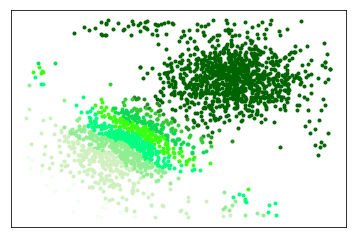

In [164]:
# Not Normalized, but here not possible, as it has negative values
#plot_custom_clusters_2(c_k_o_i_2, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')

# Normalized
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


In [165]:
num_clusters_uni = len(np.unique(clusters_labels))
print(num_clusters_uni)


2


In [166]:
clusters_averages = np.zeros((num_clusters_uni, 3))
for i in range(c_k_o_i_3_norm.shape[0]):
    clusters_averages[int(sampled_df.iloc[i]['L'])][0] += c_k_o_i_3_norm[i][int(sampled_df.iloc[i]['L'])]
    clusters_averages[int(sampled_df.iloc[i]['L'])][1] += 1

In [167]:
clusters_averages

array([[1128.23217928, 1129.        ,    0.        ],
       [1122.19469492, 1123.        ,    0.        ]])

In [168]:
for i in range(clusters_averages.shape[0]):
    clusters_averages[i][2] = round(clusters_averages[i][0]/clusters_averages[i][1],4)

print(clusters_averages[i][0])

1122.1946949189803


In [169]:
clusters_averages

array([[1.12823218e+03, 1.12900000e+03, 9.99300000e-01],
       [1.12219469e+03, 1.12300000e+03, 9.99300000e-01]])

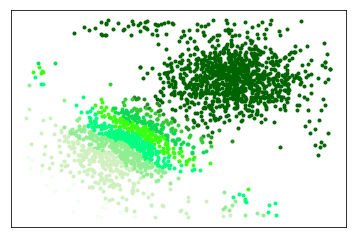

In [170]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


## Again Finding Neighbors for Spatial Filters

In [171]:
label_col_name = 'L'
num_neighbors = 7
#num_neighbors = len(select_df)
#print(len(select_df))

In [172]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  

In [173]:
knn.shape

(2252, 7)

In [174]:
row_neighbors_list = {}

for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]
    #print(i, knn[i])

In [175]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [176]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [215]:
def getClustersIn_Out_Part(dataset, c_k_o_i, clusters_averages, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            if c_k_o_i[i][j] >= alpha or c_k_o_i[i][j] >= clusters_averages[j][2]:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [178]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        average_distance = total_distance/len(cluster_dataset)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

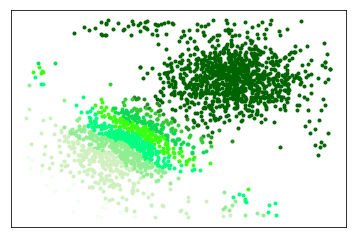

In [180]:
sampled_df.shape
#print(sampled_df)
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')


In [181]:
clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [182]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [183]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
#clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


In [184]:
def getEvaluationValues(dataset, dataset_neighbors, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    neighbor_averages_list = [] 
    for index in dataset_neighbors:
        for i in range(num_neighbors):
            dataset_index = dataset_neighbors[index][i]
            cluster_label = sampled_df.iloc[dataset_index]['L']
            c_k_o_i[index][int(cluster_label)] += 1
    
    
    return (c_k_o_i/num_neighbors)

In [185]:
ground_truth = {}
    
for i in range(c_k_o_i_3_norm.shape[0]):
    obj = [] 
    for col in features:
        #obj = (dataset['Col1'][i], dataset['Col2'][i])
        obj.append(sampled_df[col][i])
    obj = tuple(obj)

    ground_truth[obj] = sampled_df['L'][i]

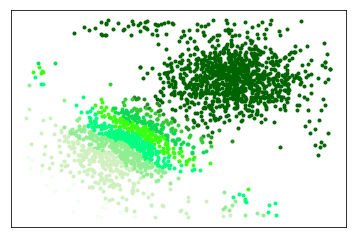

In [186]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result3')


import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


In [187]:
import operator
import math

In [188]:
#Update Nearest Neighbor Evaluation Values By Applying Distance based on 3*Sigma + Mean
def getUpdatedEvaluation(dataset, clusters_labels, dataset_neighbors, clusters_centroids, c_k_o_i, features_set):
    
    clusters_labels = np.unique(dataset[label_col_name])        
    
    count_fringe = 0
    for index, o_c in dataset.iterrows():
        total_distance = 0
        for i in range(num_neighbors):
            distance = 0
            neighbor_index = dataset_neighbors[index][i]
            neighbor_obj = dataset.iloc[neighbor_index]

            for col in features_set:
                if col != label_col_name:
                    distance += (neighbor_obj[col] - o_c[col])**2

            distance = math.sqrt(distance)
            total_distance += distance 


        neighbor_average = total_distance/num_neighbors
        cluster_label = dataset.iloc[index]['L']
        cluster_average = clusters_centroids[cluster_label][1]
        cluster_average_average = clusters_centroids[cluster_label][2]
        cluster_average_std = clusters_centroids[cluster_label][3]
        
        #print("neighbor_average: ",neighbor_average)
        #print("cluster_average_average: ", cluster_average_average)
        #print("cluster_average: ", cluster_average)
        #if (sigma_multiples*neighbor_average) > cluster_average:
        #print("1: ", neighbor_average)
        #print(sigma_multiples*cluster_average_std + cluster_average_average)
        #print("cluster_average_std: ", cluster_average_std)
        
        #Code to set evaluation value score based on 3*Sigma + Mean rule
        if (neighbor_average) > (sigma_multiples*cluster_average_std + cluster_average_average):
            #print("sigma_multiples*cluster_average_std + cluster_average_average: ", sigma_multiples*cluster_average_std + cluster_average_average)
            count_fringe += 1
            cluster_label = dataset.iloc[index]['L']
            #c_k_o_i_min_inside[index][int(cluster_label)] = 0
            c_k_o_i[index][int(cluster_label)] = (sigma_multiples*cluster_average_std + cluster_average_average)/neighbor_average
    
    #print(count_fringe)
    return c_k_o_i


In [189]:
#print(c_k_o_i)

In [190]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
            
            #print(neighbor_c_k_o_i)
            #print("Mean", np.mean(neighbor_c_k_o_i))
            #print("Min", np.nanmin(neighbor_c_k_o_i))
            #print("Max", np.nanmax(neighbor_c_k_o_i))
            #print("Median", np.median(neighbor_c_k_o_i))
            #print("Laplacian", c_k_o_i_laplacian[index][int(cluster_label)])            
    
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [191]:
#row_neighbors_list
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')


In [192]:
# Normal
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)

# Method 1: Nearest in C / Nearest Not in C
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_norm, features)

# Method 2: Nearest in C / Farthest in C
c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_3_norm, features)

In [193]:
print(len(c_k_o_i_min[c_k_o_i_min  == 1]))
print(len(c_k_o_i_max[c_k_o_i_max  == 1]))
print(len(c_k_o_i_mean[c_k_o_i_mean == 1]))

print(len(c_k_o_i_3_norm[c_k_o_i_3_norm == 1]))

2205
2251
2205
2224


In [194]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i_3_norm)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

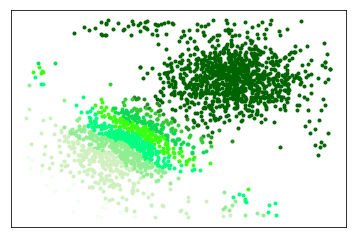

In [199]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


print(len(c_k_o_i[c_k_o_i == 1]))
print(len(c_k_o_i_norm[c_k_o_i_norm == 1]))
print(len(c_k_o_i_min[c_k_o_i_min == 1]))
print(len(c_k_o_i_max[c_k_o_i_max == 1]))

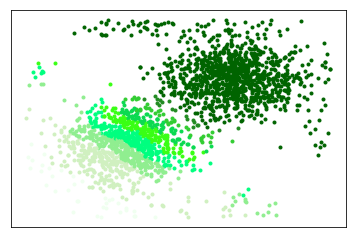

In [200]:
plot_custom_clusters_2(c_k_o_i_min, clusters_averages, clusters_labels, 5, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result2')

In [ ]:
# Run this Code only if we have Test data in dataset i.e. sampled_df['Out']
def euclidean_distance(row1, row2, features_set):
    distance = 0.0
    for col in features_set:
        if col != label_col_name:
            distance += (row1[col] - row2[col])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(dataset_train, row, row_index, num_neighbors,final_inside):
    distances = list()
    neighbors = list()

    #Code used to count object itself as neighbour of its own
    #distances.append((row_index, row, 0))

    for index, row_dataset_train in dataset_train.iterrows():
        if tuple(row_dataset_train) in final_list:
            dist = euclidean_distance(row, row_dataset_train, features)
            #print(dist)
            distances.append((index, row_dataset_train, dist))

    distances.sort(key=lambda tup: tup[2])
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])        
    return neighbors


def get_testdata_neighbors_list(num_neighbors, final_inside):
    row_neighbors_list_test = {}
    # calculate the Euclidean distance between two vectors
    for index, row in select_df_test.iterrows():
        neighbors = get_neighbors(select_df, row, index, num_neighbors,final_inside)
        row_neighbors_list_test[index] = neighbors
    
    return row_neighbors_list_test


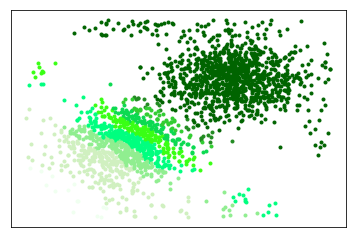

In [201]:
plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')

In [202]:
#write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)

In [203]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean_test, alpha, beta)


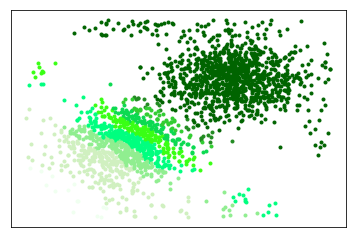

In [204]:
plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')


In [205]:
c_k_o_i_mean.shape
c_k_o_i_3_norm.shape

(2252, 2)

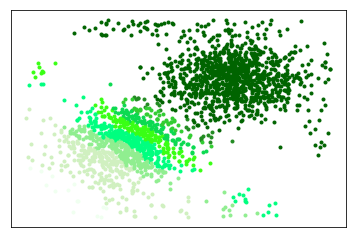

In [206]:
plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))


In [207]:
colors_inside = getColorsInside()
c_k_o_i_mean[c_k_o_i_mean == 0]

array([], dtype=float64)

Total Inside:  2067
Total Outside:  0
Total Partial:  46


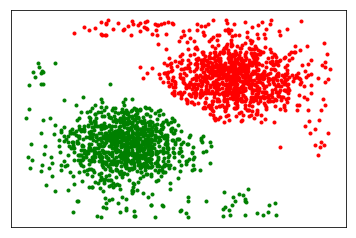

In [220]:
alpha = 1
#clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_mean, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, clusters_averages, alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')


In [221]:
c_k_o_i_diff = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
        c_k_o_i_diff[i][j] = c_k_o_i_3_norm[i][j] - c_k_o_i_mean[i][j]

#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
        c_k_o_i_sharp[i][j] = c_k_o_i_3_norm[i][j] + c_k_o_i_diff[i][j]
        if c_k_o_i_sharp[i][j] > 1:
            c_k_o_i_sharp[i][j] = 1
        

In [222]:
c_k_o_i_sharp.shape

(2252, 2)

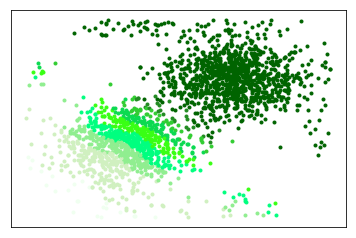

In [224]:
plot_custom_clusters_2(c_k_o_i_sharp, clusters_averages, clusters_labels, 5, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')

Total Inside:  2088
Total Outside:  0
Total Partial:  25


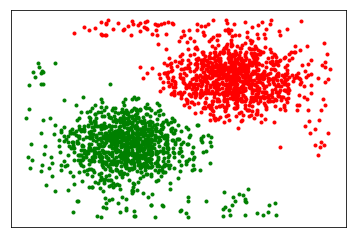

In [219]:
alpha = 1
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')


In [218]:
clusters_averages

array([[1.12823218e+03, 1.12900000e+03, 9.99300000e-01],
       [1.12219469e+03, 1.12300000e+03, 9.99300000e-01]])